In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
import seaborn as sns

In [3]:
plt.style.use("seaborn-colorblind")

In [28]:
dateparse12 = lambda x: pd.datetime.strptime(x, '%d/%m/%Y')
dateparse14 = lambda x: pd.datetime.strptime(x, '%d-%m-%y')
dateparse15 = lambda x: pd.datetime.strptime(x, '%d-%m-%y')

data12 = pd.read_csv("cpcb_dly_aq_delhi-2012.csv", parse_dates=['Sampling Date'], date_parser=dateparse12).drop("Location of Monitoring Station", axis=1).sort_values("Sampling Date")    
data12 = data12[data12["Type of Location"] != "Industrial Area"]
data14 = pd.read_csv("cpcb_dly_aq_delhi-2014.csv", parse_dates=['Sampling Date'], date_parser=dateparse14).drop("Location of Monitoring Station", axis=1).sort_values("Sampling Date")    
data14 = data14[data14["Type of Location"] != "Industrial Area"]
data15 = pd.read_csv("cpcb_dly_aq_delhi-2015.csv", parse_dates=['Sampling Date'], date_parser=dateparse15).drop("Location of Monitoring Station", axis=1).sort_values("Sampling Date")    
data15 = data15[data15["Type of Location"] != "Industrial Area"]

In [29]:
data12["DateMonth"]=data12["Sampling Date"].dt.to_period("M")
data14["DateMonth"]=data14["Sampling Date"].dt.to_period("M")
data15["DateMonth"]=data15["Sampling Date"].dt.to_period("M")

In [10]:
data15.head()

,Stn Code,SO2,NO2,RSPM/PM10
DateMonth,,,,
2015-01,166.400000,4.200000,59.485714,194.742857
2015-02,161.097561,4.560976,66.829268,209.487805
2015-03,161.195122,4.292683,68.219512,158.365854
2015-04,156.947368,4.868421,66.842105,205.947368
2015-05,169.904762,5.500000,66.761905,182.428571


In [38]:
periods = data15.index.to_native_types
periods

<bound method Index.to_native_types of Index(['2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12'],
      dtype='object', name='DateMonth')>

In [33]:
data15.index = data15.index.to_series().astype(str)
xTicks = data15.index

<IPython.core.display.Javascript object>


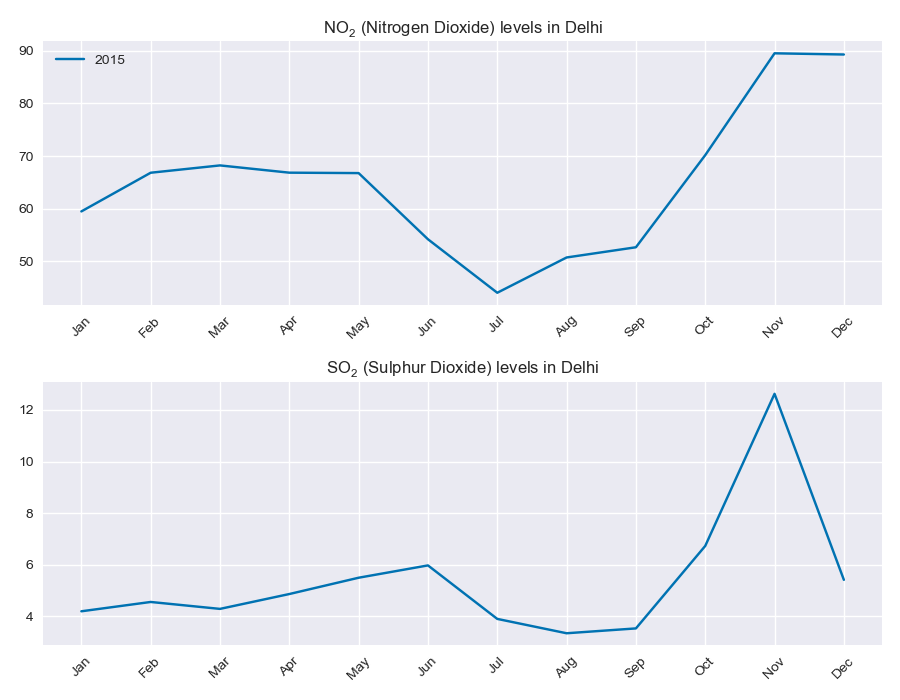

In [37]:
#plt.plot_date(data12["NO2"],xTicks , '-r')
plt.figure(figsize=(9, 7))
plt.subplot(211)
plt.cla()

plotter = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep',
           'Oct', 'Nov', 'Dec']
x = np.arange(0,len(data15["NO2"]),1)
ax = plt.gca()
#ax.plot(x, data12["NO2"])
#ax.plot(x, data13["NO2"])
#ax.plot(x, data14["NO2"])
ax.plot(x, data15["NO2"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(x)
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.2)
plt.legend([2015],loc=2)
plt.title("$\mathregular{NO_2}$ (Nitrogen Dioxide) levels in Delhi")
ax.set_xticklabels(plotter)



plt.subplot(212)
plt.cla()
plotter = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep',
           'Oct', 'Nov', 'Dec']
x = np.arange(0,len(data15["SO2"]),1)
ax = plt.gca()
#ax.plot(x, data12["SO2"])
#ax.plot(x, data13["SO2"])
#ax.plot(x, data14["SO2"])
ax.plot(x, data15["SO2"])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xticks(x)
plt.xticks(rotation=45)


plt.title("$\mathregular{SO_2}$ (Sulphur Dioxide) levels in Delhi")
ax.set_xticklabels(plotter)

plt.tight_layout()
plt.show()

In [55]:
data15

,Stn Code,SO2,NO2,RSPM/PM10
DateMonth,,,,
2015-01,166.400000,4.200000,59.485714,194.742857
2015-02,161.097561,4.560976,66.829268,209.487805
2015-03,161.195122,4.292683,68.219512,158.365854
2015-04,156.947368,4.868421,66.842105,205.947368
2015-05,169.904762,5.500000,66.761905,182.428571
2015-06,164.886364,5.977273,54.204545,155.613636
2015-07,167.348837,3.904762,44.047619,151.047619
2015-08,167.325581,3.348837,50.744186,138.953488
2015-09,158.785714,3.536585,52.682927,152.268293
